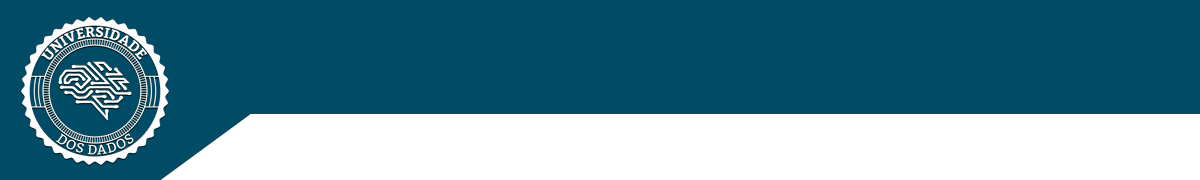

## MongoDB com Twitter

## Preparando a Conexão com o Twitter

In [ ]:
#Instalando o módulo pelo S.O
!pip install tweepy
!pip install pymongo

In [ ]:
#Trazendo as bibliotecas
#Documentação: https://tweepy.readthedocs.io/en/v3.5.0/
#              https://www.w3schools.com/python/python_json.asp
#              https://docs.python.org/2/library/datetime.html
            
import json
import tweepy
import datetime
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from datetime import datetime


# Criando as chaves de acesso
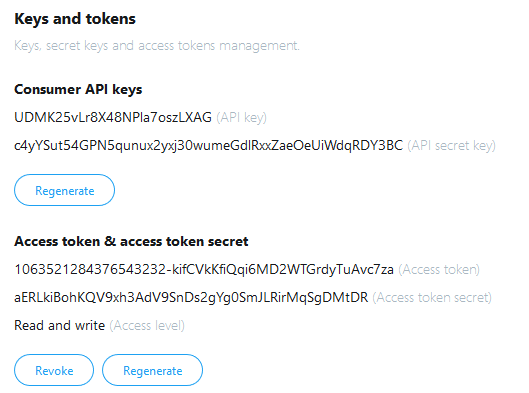

In [ ]:
# Adicione aqui sua Consumer Key
consumer_key = "UDMK25vLr8X48NPla7oszLXAG"

In [ ]:
# Adicione aqui sua Consumer Secret 
consumer_secret = "c4yYSut54GPN5qunux2yxj30wumeGdlRxxZaeOeUiWdqRDY3BC"

In [ ]:
# Adicione aqui seu Access Token
access_token = "1063521284376543232-kifCVkKfiQqi6MD2WTGrdyTuAvc7za"

In [ ]:
# Adicione aqui seu Access Token Secret
access_token_secret = "aERLkiBohKQV9xh3AdV9SnDs2gYg0SmJLRirMqSgDMtDR"

# Autenticando no Twitter

In [ ]:
#Jogando as chaves em uma variável

autenticacao = OAuthHandler(consumer_key, consumer_secret)

In [ ]:
#Jogando as chaves em uma variável

autenticacao.set_access_token(access_token, access_token_secret)

In [ ]:
#A classe abaixo captura os dados do Twitter e armazena no MongoDB
#Documentação: https://blog.wallaroolabs.com/2017/10/go-python-go-stream-processing-for-python/

class Captura(StreamListener):
    def on_data(self, dados):
        tweet = json.loads(dados)
        created_at = tweet["created_at"]
        id_str = tweet["id_str"]
        text = tweet["text"]
        obj = {"created_at":created_at,"id_str":id_str,"text":text,}
        tweetind = colTwitter.insert_one(obj).inserted_id
        print (obj)
        return True

In [ ]:
# Criando o objeto mylistener
mylistener = Captura()

In [ ]:
#A classe stream conecta-se ao Twitter. Ela pede dois parâmetros: Autenticação com o site e o que você quer capturar
mystream = Stream(autenticacao, listener = mylistener)

## Conectando ao MongoDB para manipulação de Dados

In [ ]:
from pymongo import MongoClient

In [ ]:
client = MongoClient('localhost', 27017)

### Criando o Banco

In [ ]:
# Criando o banco de dados twitterdb
db = client.bancoTwitter

### Criando a Collection

In [ ]:
# Criando a collection "col"
colTwitter = db.tweets 

# Criando o dicionário de KeyWords

In [ ]:
# Criando uma lista de palavras chave para buscar nos Tweets
keywords = ['Flamengo', 'Vasco']

## Coletando os Dados

In [ ]:
# Iniciando o filtro e gravando os tweets no MongoDB
mystream.filter(track=keywords)

## Consultando os Dados no MongoDB

In [ ]:
mystream.disconnect()

In [ ]:
# Verificando um documento no collection

colTwitter.find_one()

## Análise de Dados com Pandas e Scikit-Learn

In [ ]:
#Observe o for item in colTwitter - Trazendo os dados da Collection

dataset = [{"created_at": item["created_at"], "text": item["text"],} for item in colTwitter.find()]

In [ ]:
#Importando o Pandas
import pandas as pd

In [ ]:
#Criando um Dataframe com os dados
df = pd.DataFrame(dataset)

In [ ]:
# Imprimindo o dataframe
df

In [ ]:
#Scikit Learn

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Vetorizando os documentos
cv = CountVectorizer()
matriz = cv.fit_transform(df.text)

In [ ]:
# Contando o número de ocorrências das principais palavras em nosso dataset
word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = matriz.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]